In [1]:
#convertendo o banco em HDF5
from nilmtk.dataset_converters import convert_lab2
convert_lab2('/home/harllan/nilmtk/data/LAB_activeReactive', '/home/harllan/nilmtk/data/LAB_activeReactive/lab2.h5')

Loading  1
Loading  2
Loading  3
Loading  4
Done converting YAML metadata to HDF5!
Done converting LAB to HDF5!


In [1]:
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (13, 4)
plt.style.use('ggplot')

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation

In [2]:
train = DataSet('/home/harllan/nilmtk/data/LAB_activeReactive/lab2.h5')
test = DataSet('/home/harllan/nilmtk/data/LAB_activeReactive/lab2.h5')
#A casa utilizada do banco LAB
building = 1
#chooseSample recebe o valor da frequência (em segundos) de amostragem
chooseSample = 32

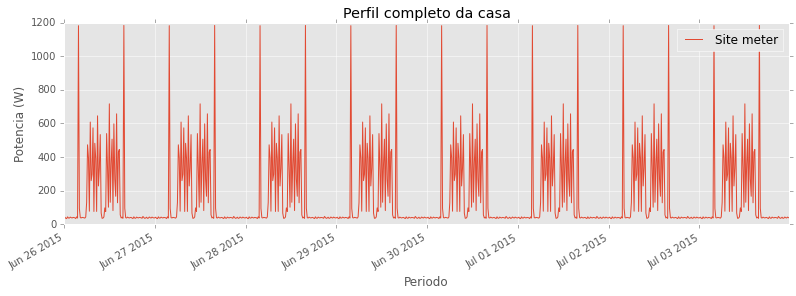

In [3]:
#Gráfico completo da casa
train.buildings[building].elec.mains().plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Perfil completo da casa");
#plt.legend('')

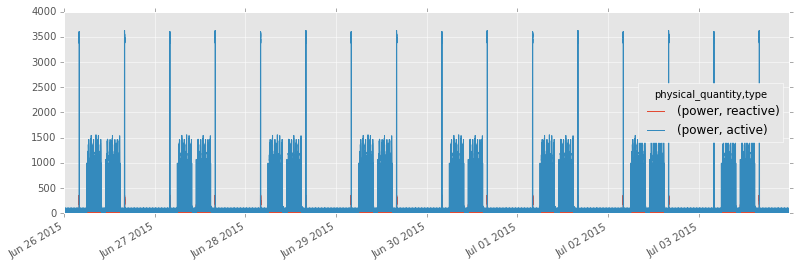

In [4]:
#Gráfico completo da casa
teste = train.buildings[building].elec.mains().load().next()
teste.plot()

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

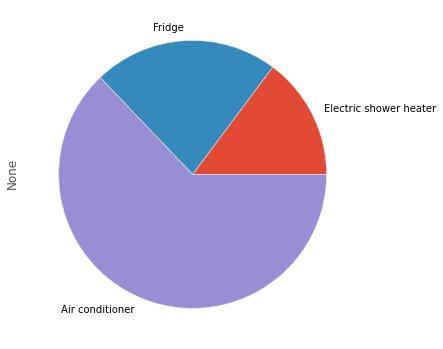

In [5]:
#Fração do consumo de energia por equipamento da casa toda
elec = train.buildings[building].elec
fraction = elec.submeters().fraction_per_meter().dropna()
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(6,6))
fraction.plot(kind='pie', labels=labels);

In [6]:
fraction

(2, 1, LAB)    0.147927
(3, 1, LAB)    0.223366
(4, 1, LAB)    0.628707
dtype: float64

In [7]:
#Divide a base: uma parte para treinamento e a outra para teste (desagregação)
#Treinamento termina em 
train.set_window(end="30-6-2015")
#Teste inicia em 
test.set_window(start="30-6-2015")

train_elec = train.buildings[building].elec
test_elec = test.buildings[building].elec

In [8]:
train_elec['fridge'].total_energy()

active      3.491351
reactive    3.431618
dtype: float64

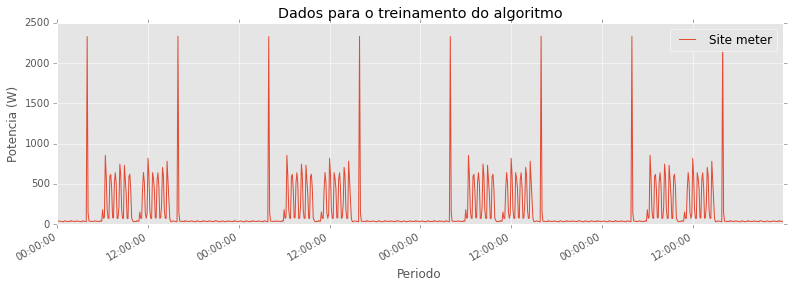

In [9]:
#Gráfico da base de treinamento
train_elec.mains().plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados para o treinamento do algoritmo");

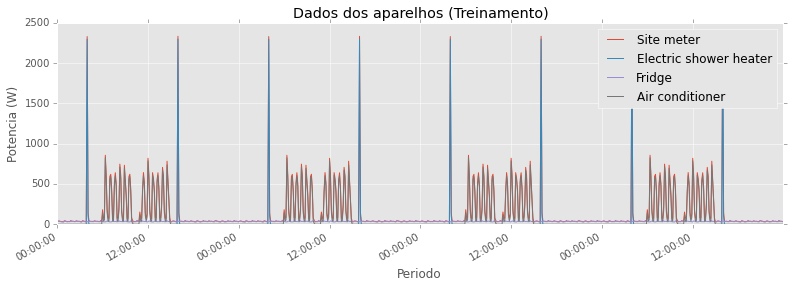

In [10]:
train_elec.plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados dos aparelhos (Treinamento)");

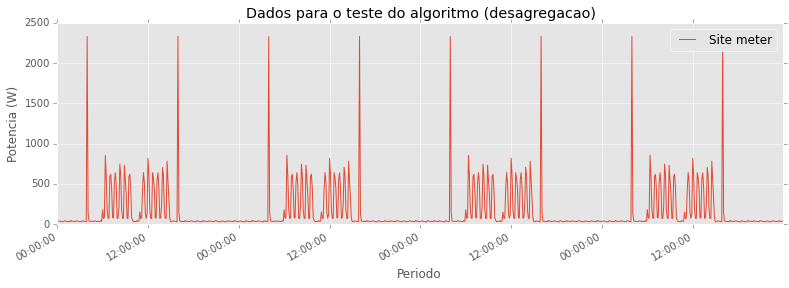

In [11]:
#Gráfico da base de teste (que pretende desagregar)
test_elec.mains().plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados para o teste do algoritmo (desagregacao)");

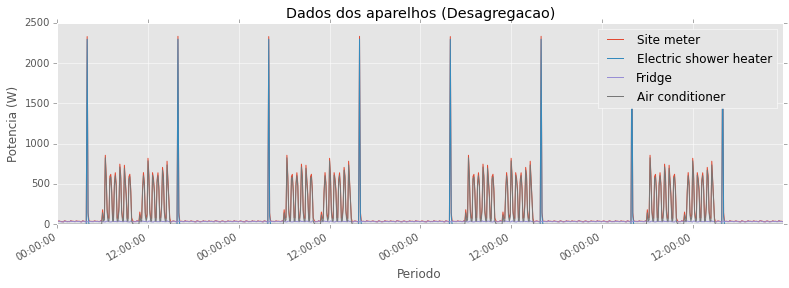

In [12]:
test_elec.plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados dos aparelhos (Desagregacao)");

In [13]:
elec = train.buildings[building].elec
fridge_meter = elec['fridge']
fridge_df = fridge_meter.load().next()
fridge_df.head(10)

physical_quantity            power       
type                      reactive active
2015-06-26 00:00:00-03:00        3      3
2015-06-26 00:00:01-03:00        1      2
2015-06-26 00:00:02-03:00        3      3
2015-06-26 00:00:03-03:00        2      2
2015-06-26 00:00:04-03:00        2      2
2015-06-26 00:00:05-03:00        2      3
2015-06-26 00:00:06-03:00        1      3
2015-06-26 00:00:07-03:00        4      4
2015-06-26 00:00:08-03:00        2      2
2015-06-26 00:00:09-03:00        1      2

In [14]:
fridge_meter = test_elec['fridge']
fridge_df = fridge_meter.load().next()
fridge_df.head()

physical_quantity            power       
type                      reactive active
2015-06-30 00:00:00-03:00        3      3
2015-06-30 00:00:01-03:00        1      2
2015-06-30 00:00:02-03:00        3      3
2015-06-30 00:00:03-03:00        2      2
2015-06-30 00:00:04-03:00        2      2

In [15]:
fridge_meter = train_elec['fridge']
fridge_df = fridge_meter.load().next()
fridge_df.head()

physical_quantity            power       
type                      reactive active
2015-06-26 00:00:00-03:00        3      3
2015-06-26 00:00:01-03:00        1      2
2015-06-26 00:00:02-03:00        3      3
2015-06-26 00:00:03-03:00        2      2
2015-06-26 00:00:04-03:00        2      2

In [16]:
train_elec['fridge'].total_energy()
#train_elec['fridge'].total_energy()['apparent']

active      3.491351
reactive    3.431618
dtype: float64

In [17]:
fridge_meter.available_columns()

[('power', 'reactive'), ('power', 'active')]

In [18]:
test_elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0

In [19]:
train_elec.total_energy()

Calculating total_energy for ElecMeterID(instance=4, building=1, dataset='LAB') ...   

active      31.261247
reactive    10.248607
dtype: float64

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

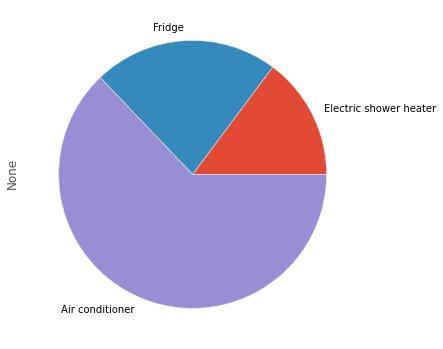

In [20]:
#Fração do consumo de energia por equipamento da metade dos dados que serão utilizados para desagregação
fraction_test = test_elec.submeters().fraction_per_meter().dropna()
labels = test_elec.get_labels(fraction_test.index)
plt.figure(figsize=(6,6))
fraction_test.plot(kind='pie', labels=labels);

In [21]:
fraction_test

(2, 1, LAB)    0.147927
(3, 1, LAB)    0.223366
(4, 1, LAB)    0.628707
dtype: float64

In [22]:
train_elec.submeters().energy_per_meter()

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

,"(2, 1, LAB)","(3, 1, LAB)","(4, 1, LAB)"
active,2.312189,3.491351,9.827083
apparent,NaN,NaN,NaN
reactive,NaN,NaN,NaN


In [24]:
fridge_test = train_elec['fridge']
#total_fridge_test_energy = fridge_test.total_energy(full_results=True)
total_fridge_test_energy = fridge_test.total_energy()
#type(total_fridge_test_energy)
total_fridge_test_energy['reactive']

3.4316177777777779

In [25]:
#Selecionando top-3 aparelhos em termos de consumo de energia, que serão usados para treinar os algoritmos
top_3_train_elec = train_elec.submeters().select_top_k(k=3)

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

In [26]:
top_3_train_elec

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=3, building=1, dataset='LAB', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=2, building=1, dataset='LAB', appliances=[Appliance(type='electric shower heater', instance=1)])
)

In [27]:
top_3_train_elec['fridge'].total_energy()

active      3.491351
reactive    3.431618
dtype: float64

In [28]:
from nilmtk.disaggregate import hart_85

In [29]:
disag_filename = '/home/harllan/nilmtk/data/LAB_activeReactive/lab2-disag-hart-' + str(chooseSample) + 'seg.h5'

#Treinando o algoritmo Hart_85 com uma frequência de "chooseSample" segundo(s)
start=time.time()
hart = hart_85.Hart85()
hart.train(top_3_train_elec, sample_period=chooseSample, cols=[('power', 'active')])
#hart.train(top_3_train_elec, sample_period=chooseSample, cols=[('power', 'active'), ('power', 'reactive')])
end=time.time()
#Tempo de treinamento do algoritmo
print('Time Train: ' + str(end-start))

Loading data for meter ElecMeterID(instance=2, building=1, dataset='LAB')     
Done loading data all meters for this chunk.
Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Time Train: 7.20371985435


In [30]:
#Desagregando os dados, também para uma frequência de "chooseSample" segundo(s)
start=time.time()
#Coloca em HDF
output = HDFDataStore(disag_filename, 'w')
hart.disaggregate(test_elec.mains(), output, sample_period=chooseSample)
output.close()
end=time.time()
#Tempo de desagregação
print('Time Disag: ' + str(end-start))

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.
Time Disag: 3.76067113876


In [31]:
disag_hart = DataSet(disag_filename)
disag_hart_elec = disag_hart.buildings[building].elec

In [32]:
#Métrica f-score, onde é retornado uma pontuação entre 0 e 1. Valor próximo à 1, significa uma boa acurácia do algoritmo.
from nilmtk.metrics import f1_score
f1_hart = f1_score(disag_hart_elec, test_elec)
f1_hart.index = disag_hart_elec.get_labels(f1_hart.index)

KeyError: ElecMeterID(instance=5, building=1, dataset='LAB')

In [ ]:
f1_hart.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('F-score');
plt.title("Algoritmo Hart - " + str(chooseSample) + " seg");

In [ ]:
f1_hart

In [33]:
fridge_disag_hart = disag_hart_elec['fridge']
fridge_test = test_elec['fridge']

KeyError: {'instance': 1, 'type': 'fridge'}

In [ ]:
#Geladeira antes da desagregação (dados reais)
fridge_test_df = fridge_test.load().next()
fridge_test_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira (real)");
#plt.legend('');

#Geladeira após desagregação
fridge_disag_hart_df = fridge_disag_hart.load().next()
fridge_disag_hart_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylim(0,120)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira desagregada (Hart - " + str(chooseSample) + " seg)");
#plt.legend('');

In [10]:
#FHMM
from nilmtk.disaggregate import fhmm_exact
#Arquivo onde vai ficar os dados da desagregação
disag_filename = '/home/harllan/nilmtk/data/LAB_activeApparent/lab2-disag-fhmm-' + str(chooseSample) + 'seg.h5'
    
#Treinando o algoritmo FHMM com uma frequência de "chooseSample" segundo(s)
start=time.time()
fhmm = fhmm_exact.FHMM()
fhmm.train(top_3_train_elec, sample_period=chooseSample)
end=time.time()
#Tempo de treinamento do algoritmo
print('Time Train: ' + str(end-start))

#Desagregando os dados, também para uma frequência de "chooseSample" segundo(s)
start=time.time()
#Coloca em HDF
output = HDFDataStore(disag_filename, 'w')
fhmm.disaggregate(test_elec.mains(), output, sample_period=chooseSample)
output.close()
end=time.time()
#Tempo de desagregação
print('Time Disag: ' + str(end-start))

Training model for submeter 'ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='LAB', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='LAB', appliances=[Appliance(type='electric shower heater', instance=1)])'
Time Train: 3.79950499535
Time Disag: 0.326489925385


In [11]:
disag_fhmm = DataSet(disag_filename)
disag_fhmm_elec = disag_fhmm.buildings[building].elec

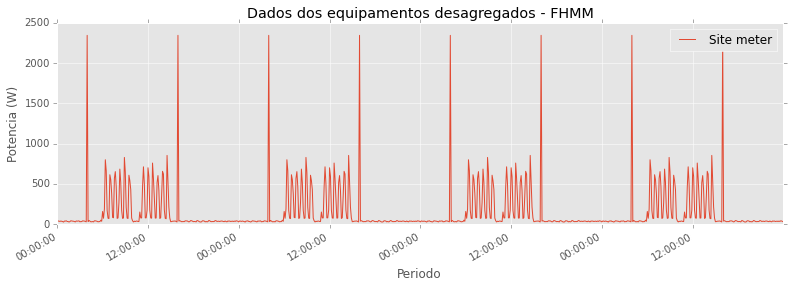

In [17]:
#Equipamentos desagregados
#disag_fhmm_elec.plot()
disag_fhmm_elec.mains().plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados dos equipamentos desagregados - FHMM");

3/3 ElecMeter(instance=4, building=1, dataset='NILMTK_FHMM_2015-09-02T09:41:36', appliances=[Appliance(type='air conditioner', instance=1)])

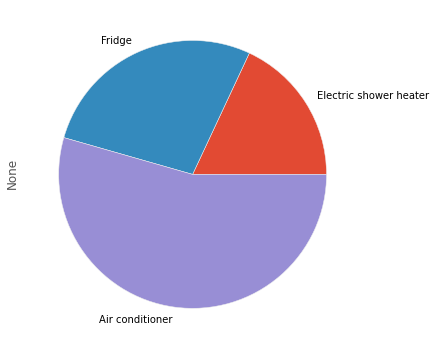

In [24]:
#Fração do consumo de energia por equipamento da metade dos dados após desagregação
fraction_disag = disag_fhmm_elec.submeters().fraction_per_meter().dropna()
labels = disag_fhmm_elec.get_labels(fraction_disag.index)
plt.figure(figsize=(6,6))
fraction_disag.plot(kind='pie', labels=labels);

In [25]:
test_elec.submeters().fraction_per_meter()

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

(2, 1, LAB)    0.147927
(3, 1, LAB)    0.223366
(4, 1, LAB)    0.628707
dtype: float64

In [26]:
disag_fhmm_elec.submeters().fraction_per_meter()

3/3 ElecMeter(instance=4, building=1, dataset='NILMTK_FHMM_2015-09-02T09:41:36', appliances=[Appliance(type='air conditioner', instance=1)])

(2, 1, NILMTK_FHMM_2015-09-02T09:41:36)    0.180362
(3, 1, NILMTK_FHMM_2015-09-02T09:41:36)    0.275330
(4, 1, NILMTK_FHMM_2015-09-02T09:41:36)    0.544308
dtype: float64

In [13]:
test_elec.submeters().energy_per_meter()

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

,"(2, 1, LAB)","(3, 1, LAB)","(4, 1, LAB)"
active,2.312189,3.491349,9.827082
apparent,NaN,NaN,NaN
reactive,NaN,NaN,NaN


In [27]:
#total (consumo) de energia real (dados agregados)
energy_per_meter = test_elec.submeters().energy_per_meter().max()
sum_test = energy_per_meter.sum()
sum_test

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

15.63062

In [28]:
#total (consumo) de energia após desagregação (dados agregados)
energy_per_meter_disag = disag_fhmm_elec.submeters().energy_per_meter().max()
disag_fhmm_energy = energy_per_meter_disag.sum()
disag_fhmm_energy

3/3 ElecMeter(instance=4, building=1, dataset='NILMTK_FHMM_2015-09-02T09:41:36', appliances=[Appliance(type='air conditioner', instance=1)])

12.733633333333334

In [ ]:
EC_fhmm = ((disag_fhmm_energy - sum_test)*100)/sum_test

In [ ]:
#Erro no consumo total (em %)
EC_fhmm

In [14]:
fridge_disag = disag_fhmm_elec['fridge']
fridge_test = test_elec['fridge']

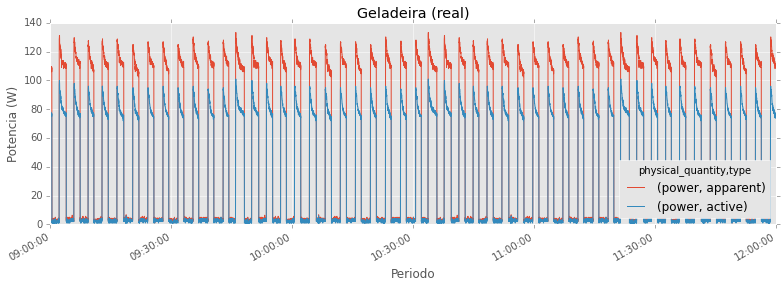

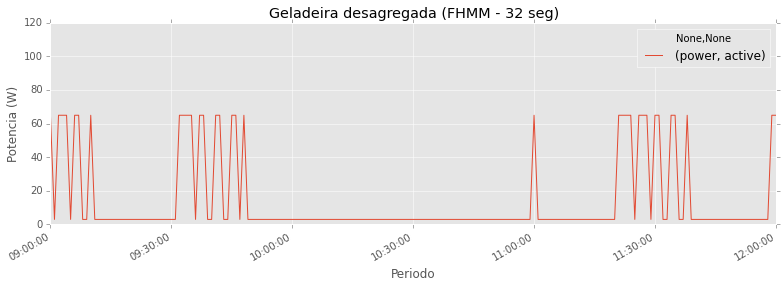

In [15]:
#Geladeira antes da desagregação (dados reais)
fridge_test_df = fridge_test.load().next()
fridge_test_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira (real)");
#plt.legend('');

#Geladeira após desagregação
fridge_disag_df = fridge_disag.load().next()
fridge_disag_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylim(0,120)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira desagregada (FHMM - " + str(chooseSample) + " seg)");
#plt.legend('');

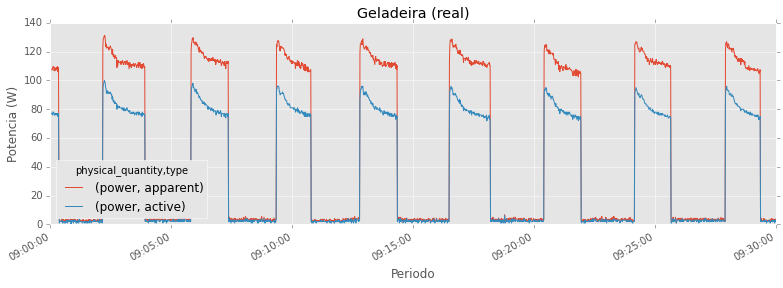

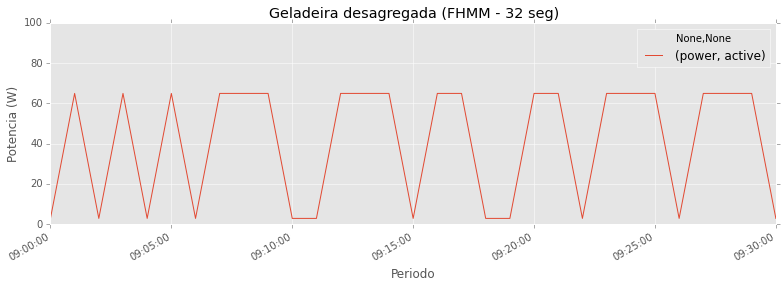

In [20]:
#Geladeira antes da desagregação (dados reais)
fridge_test_df = fridge_test.load().next()
fridge_test_df["2015-07-01 09:00:00":"2015-07-01 09:30:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira (real)");
#plt.legend('');

#Geladeira após desagregação
fridge_disag_df = fridge_disag.load().next()
fridge_disag_df["2015-07-01 09:00:00":"2015-07-01 09:30:00"].plot()
plt.ylim(0,100)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira desagregada (FHMM - " + str(chooseSample) + " seg)");
#plt.legend('');

In [40]:
#potência real da geladeira
fridge_test = test_elec['fridge']
total_fridge_test_energy = fridge_test.total_energy(full_results=True)
type(total_fridge_test_energy)
total_fridge_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  3.491349  2015-07-03 23:59:58-03:00

In [41]:
#potência após desagregação da geladeira
fridge_disag = disag_fhmm_elec['fridge']
total_fridge_disag_energy = fridge_disag.total_energy(full_results=True)
type(total_fridge_disag_energy)
total_fridge_disag_energy

                            active                        end
2015-06-30 00:00:00-03:00  3.50595  2015-07-03 23:59:00-03:00

In [16]:
shower_test = test_elec['electric shower heater']
shower_disag = disag_fhmm_elec['electric shower heater']

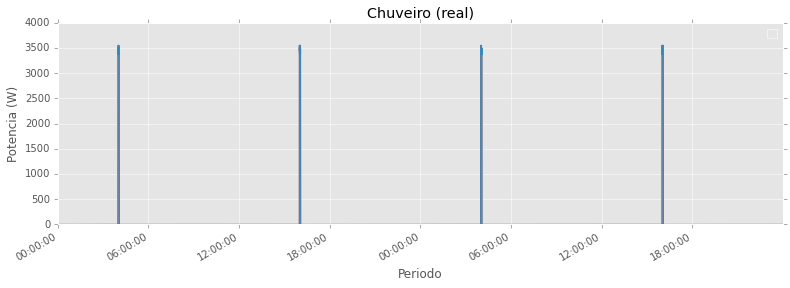

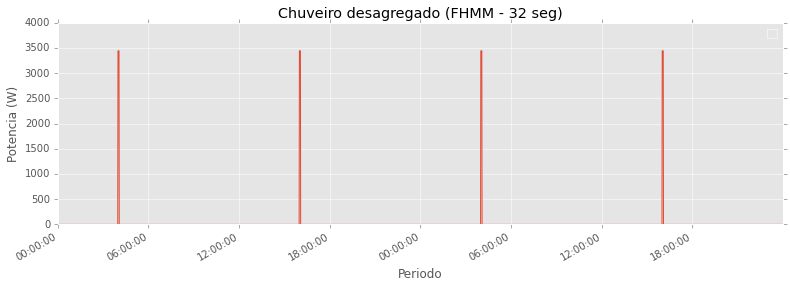

In [17]:
#Chuveiro antes da desagregação (dados reais)
shower_test_df = shower_test.load().next()
shower_test_df["2015-07-01":"2015-07-02"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Chuveiro (real)");
plt.legend('');

#Chuveiro após desagregação
shower_disag_df = shower_disag.load().next()
shower_disag_df["2015-07-01":"2015-07-02"].plot()
plt.ylim(0,4000)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Chuveiro desagregado (FHMM - " + str(chooseSample) + " seg)");
plt.legend('');

In [30]:
#potência real do chuveiro
shower_test = test_elec['electric shower heater']
total_shower_test_energy = shower_test.total_energy(full_results=True)
type(total_shower_test_energy)
total_shower_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  2.312189  2015-07-03 23:59:58-03:00

In [31]:
#potência após desagregação do chuveiro
shower_disag = disag_fhmm_elec['electric shower heater']
total_shower_disag_energy = shower_disag.total_energy(full_results=True)
type(total_shower_disag_energy)
total_shower_disag_energy

                             active                        end
2015-06-30 00:00:00-03:00  2.296667  2015-07-03 23:59:00-03:00

In [19]:
#Ar-condicionado
air_test = test_elec['air conditioner']
air_disag = disag_fhmm_elec['air conditioner']

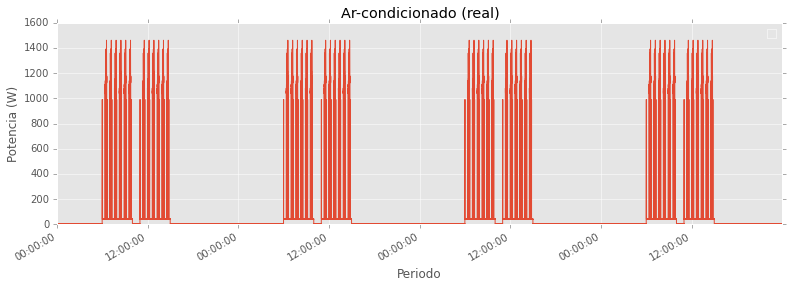

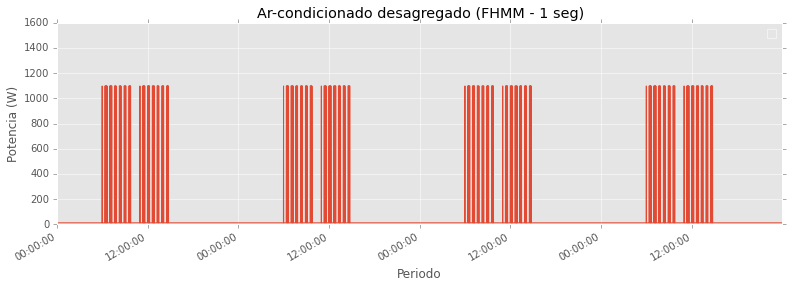

In [33]:
#Ar-condicionado antes da desagregação (dados reais)
air_test_df = air_test.load().next()
air_test_df.plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado (real)");
plt.legend('');

#Ar-condicionado após desagregação
air_disag_df = air_disag.load().next()
air_disag_df.plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado desagregado (FHMM - " + str(chooseSample) + " seg)");
plt.legend('');

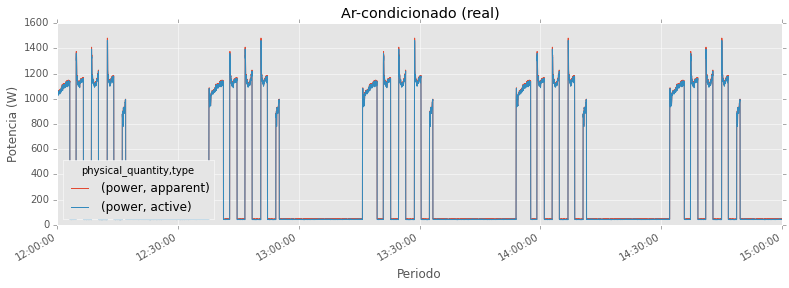

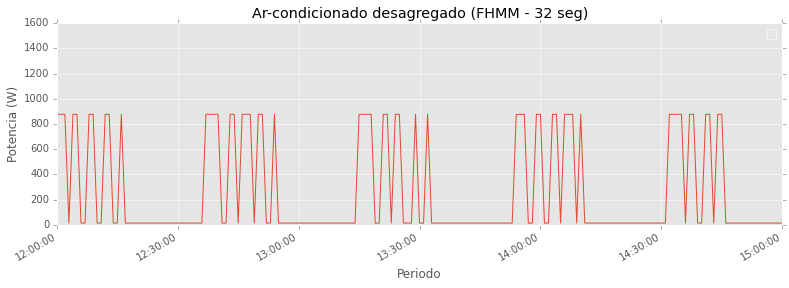

In [21]:
#Ar-condicionado antes da desagregação (dados reais)
air_test_df = air_test.load().next()
air_test_df["2015-07-01 12:00:00":"2015-07-01 15:00:00"].plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado (real)");
#plt.legend('');

#Ar-condicionado após desagregação
air_disag_df = air_disag.load().next()
air_disag_df["2015-07-01 12:00:00":"2015-07-01 15:00:00"].plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado desagregado (FHMM - " + str(chooseSample) + " seg)");
plt.legend('');

In [35]:
#potência real do ar-condicionado
air_test = test_elec['air conditioner']
total_air_test_energy = air_test.total_energy(full_results=True)
type(total_air_test_energy)
total_air_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  9.827082  2015-07-03 23:59:58-03:00

In [36]:
#potência após desagregação do ar-condicionado
air_disag = disag_fhmm_elec['air conditioner']
total_air_disag_energy = air_disag.total_energy(full_results=True)
type(total_air_disag_energy)
total_air_disag_energy

                             active                        end
2015-06-30 00:00:00-03:00  9.284183  2015-07-03 23:59:00-03:00

In [21]:
#Métrica f-score, onde é retornado uma pontuação entre 0 e 1. Valor próximo à 1, significa uma boa acurácia do algoritmo.
from nilmtk.metrics import f1_score
f1_fhmm = f1_score(disag_fhmm_elec, test_elec)
f1_fhmm.index = disag_fhmm_elec.get_labels(f1_fhmm.index)

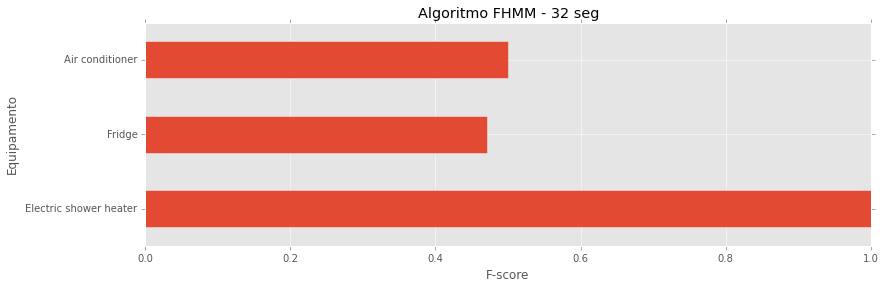

In [22]:
f1_fhmm.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('F-score');
plt.title("Algoritmo FHMM - " + str(chooseSample) + " seg");

In [23]:
f1_fhmm

Electric shower heater    1.000000
Fridge                    0.471703
Air conditioner           0.500065
dtype: float64

In [24]:
from nilmtk.metrics import fraction_energy_assigned_correctly
fte_fhmm = fraction_energy_assigned_correctly(disag_fhmm_elec, test_elec)
fte_fhmm

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

0.98408960222904718

In [25]:
from nilmtk.metrics import error_in_assigned_energy
ea_fhmm = error_in_assigned_energy(disag_fhmm_elec, test_elec)
ea_fhmm.index = disag_fhmm_elec.get_labels(ea_fhmm.index)

In [26]:
ea_fhmm

Electric shower heater    active      0.079796
apparent         NaN
dtyp...
Fridge                    active      0.239674
apparent         NaN
dtyp...
Air conditioner           active      0.869789
apparent         NaN
dtyp...
dtype: object

In [ ]:
#Geladeira
fridge_test = test_elec['fridge']
fridge_test_energy = fridge_test.total_energy()

fridgeError = ea_fhmm['Fridge']['active']

print('Consumo real: ' + str(fridge_test_energy['active']) + '  ----  Erro: ' + str(fridgeError))

In [ ]:
#Erro no consumo (em %) para a Geladeira
ECf = (fridgeError*100)/fridge_test_energy['active']
ECf

In [ ]:
#Chuveiro
shower_test = test_elec['electric shower heater']
shower_test_energy = shower_test.total_energy()

showerError = ea_fhmm['Electric shower heater']['active']

print('Consumo real: ' + str(shower_test_energy['active']) + '  ----  Erro: ' + str(showerError))

In [ ]:
#Erro no consumo (em %) para o chuveiro
ECs = (showerError*100)/shower_test_energy['active']
ECs

In [ ]:
#Ar-condicionado
air_test = test_elec['air conditioner']
air_test_energy = air_test.total_energy()

airError = ea_fhmm['Air conditioner']['active']

print('Consumo real: ' + str(air_test_energy['active']) + '  ----  Erro: ' + str(airError))

In [ ]:
#Erro no consumo (em %) para o ar-condicionado
ECa = (airError*100)/air_test_energy['active']
ECa

In [27]:
#Métrica MNE. Representa o erro e quanto menor o seu valor, melhor é a precisão da desagregação.
from nilmtk.metrics import mean_normalized_error_power
mne_fhmm = mean_normalized_error_power(disag_fhmm_elec, test_elec)
mne_fhmm.index = disag_fhmm_elec.get_labels(mne_fhmm.index)

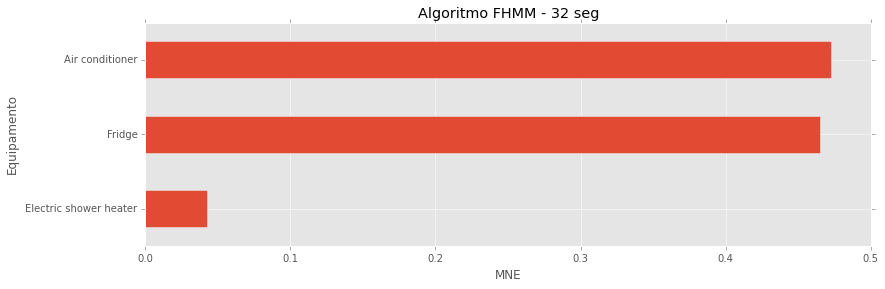

In [28]:
mne_fhmm.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('MNE');
plt.title("Algoritmo FHMM - " + str(chooseSample) + " seg");

In [29]:
mne_fhmm

Electric shower heater    0.042655
Fridge                    0.465119
Air conditioner           0.472502
dtype: float64

In [30]:
#Métrica RMS. Representa o erro e quanto menor o seu valor, melhor é a precisão da desagregação.
from nilmtk.metrics import rms_error_power
rms_fhmm = rms_error_power(disag_fhmm_elec, test_elec)
rms_fhmm.index = disag_fhmm_elec.get_labels(rms_fhmm.index)

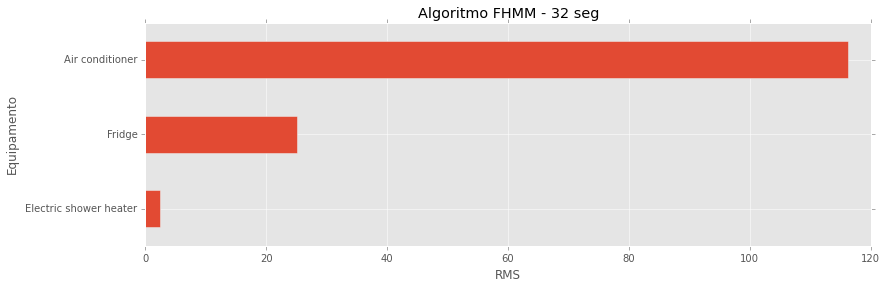

In [31]:
rms_fhmm.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('RMS');
plt.title("Algoritmo FHMM - " + str(chooseSample) + " seg");

In [32]:
rms_fhmm

Electric shower heater      2.351206
Fridge                     25.010776
Air conditioner           116.180564
dtype: float64

In [47]:
#Métricas
#Arquivo com os resultados das métricas
path = '/home/harllan/Documentos/NILMTK_Disag/LAB_Tests/metrics_equip.txt'
result = ''

result = 'Fridge,' + str(chooseSample) + ',FHMM,' + str(f1_fhmm['Fridge']) + ',' + str(mne_fhmm['Fridge']) + ',' + str(rms_fhmm['Fridge'])
result = result + '\n'
result = result + 'Shower,' + str(chooseSample) + ',FHMM,' + str(f1_fhmm['Electric shower heater']) + ',' + str(mne_fhmm['Electric shower heater']) + ',' + str(rms_fhmm['Electric shower heater'])
result = result + '\n'
result = result + 'Air-conditioner,' + str(chooseSample) + ',FHMM,' + str(f1_fhmm['Air conditioner']) + ',' + str(mne_fhmm['Air conditioner']) + ',' + str(rms_fhmm['Air conditioner'])

#Escrevendo em arquivo.txt
#'a' é de append, adiciona sem apagar o que já tem no arquivo
arquivo = open(path, 'a')
arquivo.write('\n')
arquivo.write(result)
arquivo.close()

In [33]:
#CO
from nilmtk.disaggregate import CombinatorialOptimisation
#Arquivo onde vai ficar os dados da desagregação
disag_filename = '/home/harllan/nilmtk/data/LAB_active/lab-disag-co-' + str(chooseSample) + 'seg.h5'

#Treinando o algoritmo CO com uma frequência de "chooseSample" segundo(s)
start=time.time()
co = CombinatorialOptimisation()
co.train(top_3_train_elec, sample_period=chooseSample)
end=time.time()
#Tempo de treinamento do algoritmo
print('Time train: ' + str(end-start))

#Desagregando os dados, também para uma frequência de "chooseSample" segundo(s)
start=time.time()
#Coloca em HDF
output = HDFDataStore(disag_filename, 'w')
co.disaggregate(test_elec.mains(), output, sample_period=chooseSample)
output.close()
end=time.time()
#Tempo de desagregação
print('Time disag: ' + str(end-start))

Training model for submeter 'ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])'
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='LAB', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=2, building=1, dataset='LAB', appliances=[Appliance(type='electric shower heater', instance=1)])'
Done training!
Time train: 1.51396894455
vampire_power = 0.0 watts
Estimating power demand for 'ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])'
Estimating power demand for 'ElecMeter(instance=3, building=1, dataset='LAB', appliances=[Appliance(type='fridge', instance=1)])'
Estimating power demand for 'ElecMeter(instance=2, building=1, dataset='LAB', appliances=[Appliance(type='electric shower heater', instance=1)])'
Time disag: 0.435841083527


In [34]:
disag_co = DataSet(disag_filename)
disag_co_elec = disag_co.buildings[building].elec

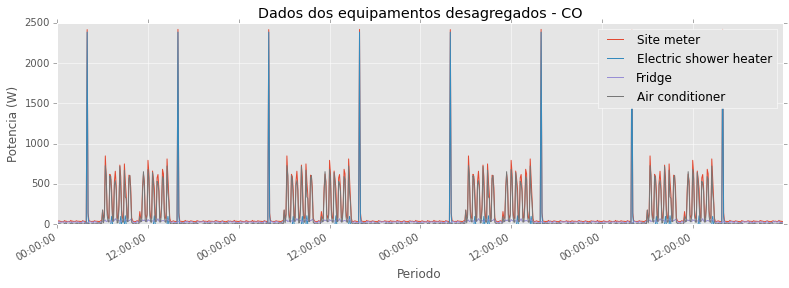

In [35]:
#Equipamentos desagregados
disag_co_elec.plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Dados dos equipamentos desagregados - CO");

3/3 ElecMeter(instance=4, building=1, dataset='NILMTK_CO_2015-08-11T23:21:57', appliances=[Appliance(type='air conditioner', instance=1)])

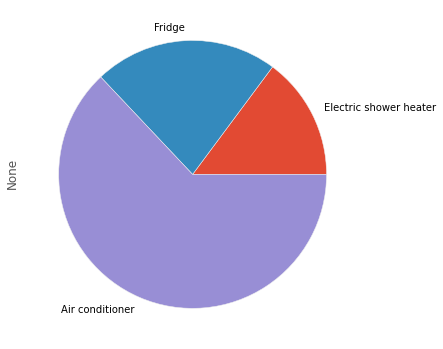

In [51]:
#Fração do consumo de energia por equipamento da metade dos dados após desagregação
fraction_disag_co = disag_co_elec.submeters().fraction_per_meter().dropna()
labels = disag_co_elec.get_labels(fraction_disag_co.index)
plt.figure(figsize=(6,6))
fraction_disag_co.plot(kind='pie', labels=labels);

In [52]:
fraction_disag_co

(2, 1, NILMTK_CO_2015-08-11T23:21:57)    0.148217
(3, 1, NILMTK_CO_2015-08-11T23:21:57)    0.222167
(4, 1, NILMTK_CO_2015-08-11T23:21:57)    0.629616
dtype: float64

In [53]:
#total (consumo) de energia real (dados agregados)
energy_per_meter = test_elec.submeters().energy_per_meter().max()
sum_test = energy_per_meter.sum()
sum_test

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

15.63062

In [54]:
#total (consumo) de energia após desagregação (dados agregados)
energy_per_meter_disag_co = disag_co_elec.submeters().energy_per_meter().max()
disag_co_energy = energy_per_meter_disag_co.sum()
disag_co_energy

3/3 ElecMeter(instance=4, building=1, dataset='NILMTK_CO_2015-08-11T23:21:57', appliances=[Appliance(type='air conditioner', instance=1)])

15.487264444444444

In [ ]:
EC_co = ((disag_co_energy - sum_test)*100)/sum_test

In [ ]:
#Erro no consumo total (em %)
EC_co

In [36]:
fridge_test = test_elec['fridge']
fridge_disag_co = disag_co_elec['fridge']

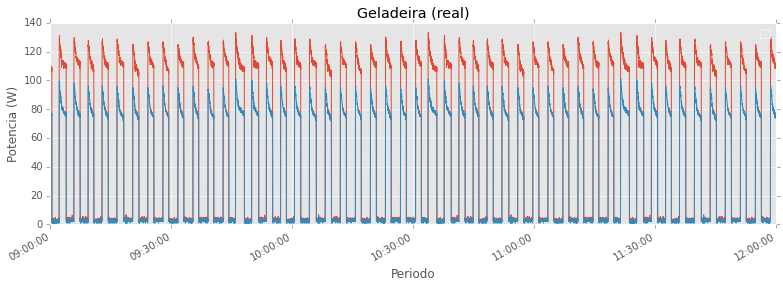

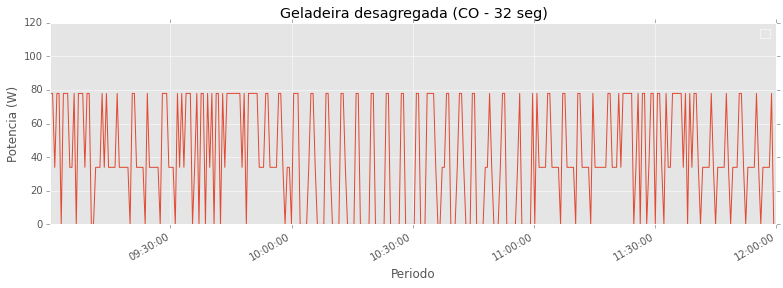

In [37]:
#Geladeira antes da desagregação (dados reais)
fridge_test_df = fridge_test.load().next()
fridge_test_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira (real)");
plt.legend('');

#Geladeira após desagregação
fridge_disag_co_df = fridge_disag_co.load().next()
fridge_disag_co_df["2015-07-01 09:00:00":"2015-07-01 12:00:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.ylim(0,120)
plt.title("Geladeira desagregada (CO - " + str(chooseSample) + " seg)");
plt.legend('');

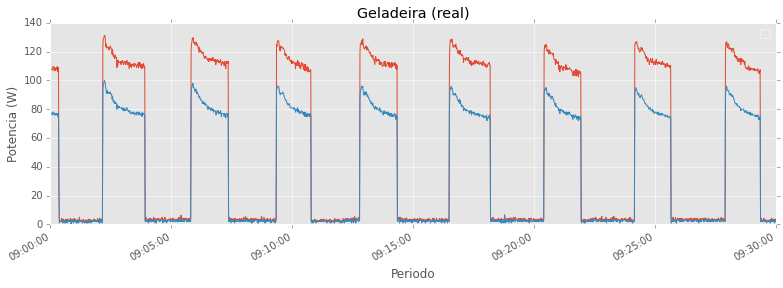

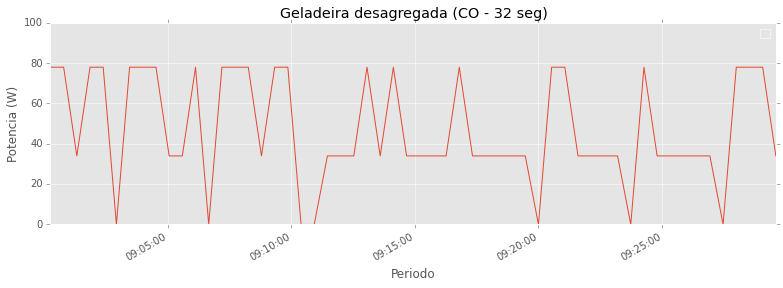

In [38]:
#Geladeira antes da desagregação (dados reais)
fridge_test_df = fridge_test.load().next()
fridge_test_df["2015-07-01 09:00:00":"2015-07-01 09:30:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Geladeira (real)");
plt.legend('');

#Geladeira após desagregação
fridge_disag_co_df = fridge_disag_co.load().next()
fridge_disag_co_df["2015-07-01 09:00:00":"2015-07-01 09:30:00"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.ylim(0,100)
plt.title("Geladeira desagregada (CO - " + str(chooseSample) + " seg)");
plt.legend('');

In [58]:
#potência real da geladeira
fridge_test = test_elec['fridge']
total_fridge_test_energy = fridge_test.total_energy(full_results=True)
type(total_fridge_test_energy)
total_fridge_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  3.491349  2015-07-03 23:59:58-03:00

In [59]:
#potência após desagregação da geladeira
fridge_disag_co = disag_co_elec['fridge']
total_fridge_disag_co_energy = fridge_disag_co.total_energy(full_results=True)
type(total_fridge_disag_co_energy)
total_fridge_disag_co_energy

                             active                        end
2015-06-30 00:00:00-03:00  3.440753  2015-07-03 23:59:58-03:00

In [60]:
shower_test = test_elec['electric shower heater']
shower_disag_co = disag_co_elec['electric shower heater']

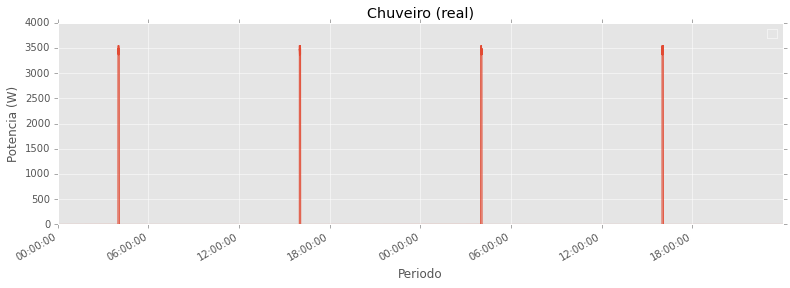

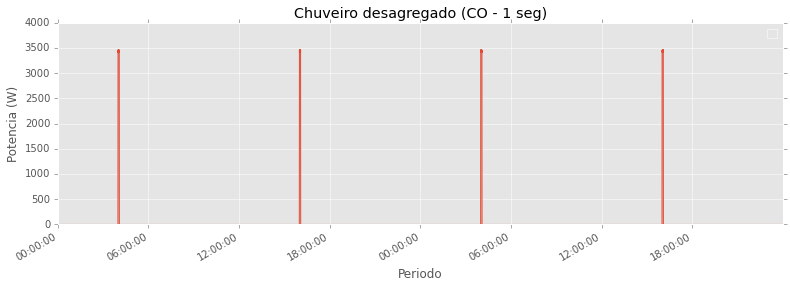

In [61]:
#Chuveiro antes da desagregação (dados reais)
shower_test_df = shower_test.load().next()
shower_test_df["2015-07-01":"2015-07-02"].plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Chuveiro (real)");
plt.legend('');

#Chuveiro após desagregação
shower_disag_co_df = shower_disag_co.load().next()
shower_disag_co_df["2015-07-01":"2015-07-02"].plot()
plt.ylim(0,4000)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Chuveiro desagregado (CO - " + str(chooseSample) + " seg)");
plt.legend('');

In [62]:
#potência real do chuveiro
shower_test = test_elec['electric shower heater']
total_shower_test_energy = shower_test.total_energy(full_results=True)
type(total_shower_test_energy)
total_shower_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  2.312189  2015-07-03 23:59:58-03:00

In [63]:
#potência após desagregação do chuveiro
shower_disag_co = disag_co_elec['electric shower heater']
total_shower_disag_co_energy = shower_disag_co.total_energy(full_results=True)
type(total_shower_disag_co_energy)
total_shower_disag_co_energy

                             active                        end
2015-06-30 00:00:00-03:00  2.295479  2015-07-03 23:59:58-03:00

In [64]:
#Ar-condicionado
air_test = test_elec['air conditioner']
air_disag_co = disag_co_elec['air conditioner']

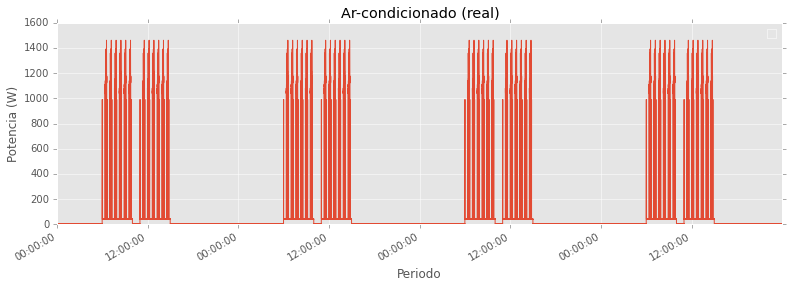

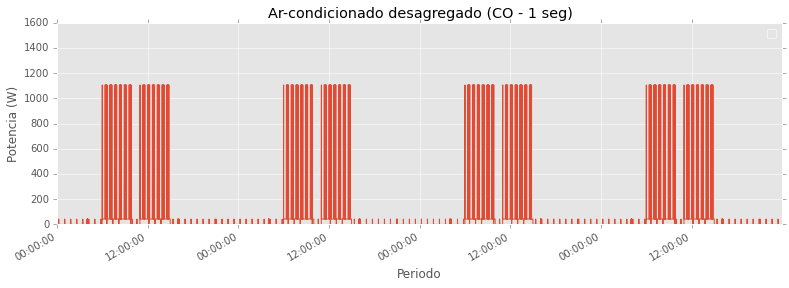

In [65]:
#Ar-condicionado antes da desagregação (dados reais)
air_test_df = air_test.load().next()
air_test_df.plot()
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado (real)");
plt.legend('');

#Ar-condicionado após desagregação
air_disag_co_df = air_disag_co.load().next()
air_disag_co_df.plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado desagregado (CO - " + str(chooseSample) + " seg)");
plt.legend('');

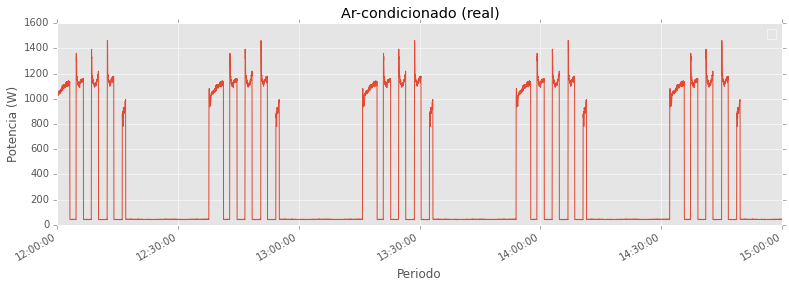

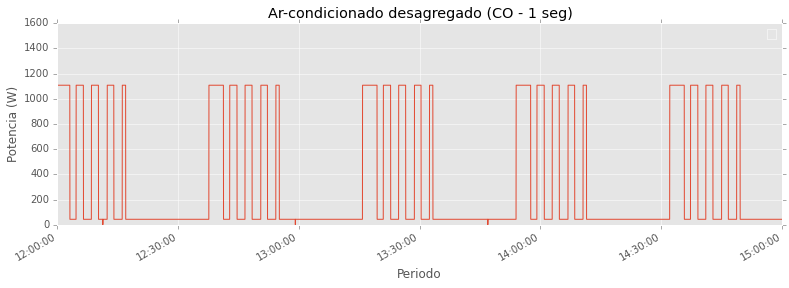

In [66]:
#Ar-condicionado antes da desagregação (dados reais)
air_test_df = air_test.load().next()
air_test_df["2015-07-01 12:00:00":"2015-07-01 15:00:00"].plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado (real)");
plt.legend('');

#Ar-condicionado após desagregação
air_disag_co_df = air_disag_co.load().next()
air_disag_co_df["2015-07-01 12:00:00":"2015-07-01 15:00:00"].plot()
plt.ylim(0,1600)
plt.ylabel('Potencia (W)');
plt.xlabel('Periodo');
plt.title("Ar-condicionado desagregado (CO - " + str(chooseSample) + " seg)");
plt.legend('');

In [67]:
#potência real do ar-condicionado
air_test = test_elec['air conditioner']
total_air_test_energy = air_test.total_energy(full_results=True)
type(total_air_test_energy)
total_air_test_energy

                             active                        end
2015-06-30 00:00:00-03:00  9.827082  2015-07-03 23:59:58-03:00

In [68]:
#potência após desagregação do ar-condicionado
air_disag_co = disag_co_elec['air conditioner']
total_air_disag_co_energy = air_disag_co.total_energy(full_results=True)
type(total_air_disag_co_energy)
total_air_disag_co_energy

                             active                        end
2015-06-30 00:00:00-03:00  9.751032  2015-07-03 23:59:58-03:00

In [39]:
#Métrica f-score, para o algoritmo CO.
from nilmtk.metrics import f1_score
f1_co= f1_score(disag_co_elec, test_elec)
f1_co.index = disag_co_elec.get_labels(f1_co.index)

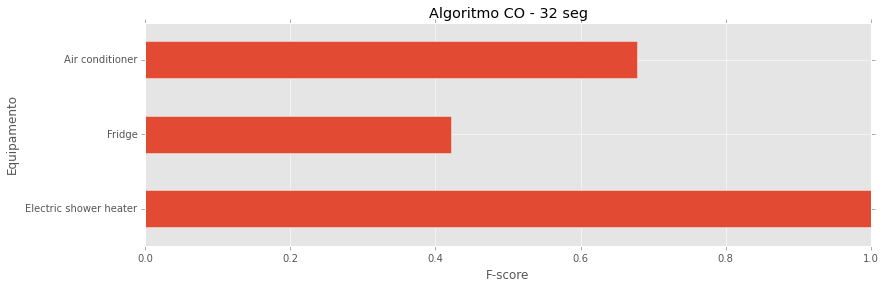

In [40]:
f1_co.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('F-score');
plt.title("Algoritmo CO - " + str(chooseSample) + " seg");

In [41]:
f1_co

Electric shower heater    1.000000
Fridge                    0.420818
Air conditioner           0.678191
dtype: float64

In [42]:
from nilmtk.metrics import fraction_energy_assigned_correctly
fte_co = fraction_energy_assigned_correctly(disag_co_elec, test_elec)
fte_co

3/3 ElecMeter(instance=4, building=1, dataset='LAB', appliances=[Appliance(type='air conditioner', instance=1)])

0.98084295201522753

In [ ]:
from nilmtk.metrics import error_in_assigned_energy
ea_co = error_in_assigned_energy(disag_co_elec, test_elec)
ea_co.index = disag_co_elec.get_labels(ea_co.index)

In [ ]:
ea_co

In [ ]:
#Geladeira
fridge_test = test_elec['fridge']
fridge_test_energy = fridge_test.total_energy()

fridgeError_co = ea_co['Fridge']['active']

print('Consumo real: ' + str(fridge_test_energy['active']) + '  ----  Erro: ' + str(fridgeError_co))

In [ ]:
#Erro no consumo (em %) para a Geladeira
ECf = (fridgeError_co*100)/fridge_test_energy['active']
ECf

In [ ]:
#Chuveiro
shower_test = test_elec['electric shower heater']
shower_test_energy = shower_test.total_energy()

showerError_co = ea_co['Electric shower heater']['active']

print('Consumo real: ' + str(shower_test_energy['active']) + '  ----  Erro: ' + str(showerError_co))

In [ ]:
#Erro no consumo (em %) para o chuveiro
ECs = (showerError_co*100)/shower_test_energy['active']
ECs

In [ ]:
#Ar-condicionado
air_test = test_elec['air conditioner']
air_test_energy = air_test.total_energy()

airError_co = ea_co['Air conditioner']['active']

print('Consumo real: ' + str(air_test_energy['active']) + '  ----  Erro: ' + str(airError_co))

In [ ]:
#Erro no consumo (em %) para o ar-condicionado
ECa = (airError_co*100)/air_test_energy['active']
ECa

In [43]:
#Métrica MNE.
from nilmtk.metrics import mean_normalized_error_power
mne_co = mean_normalized_error_power(disag_co_elec, test_elec)
mne_co.index = disag_co_elec.get_labels(mne_co.index)

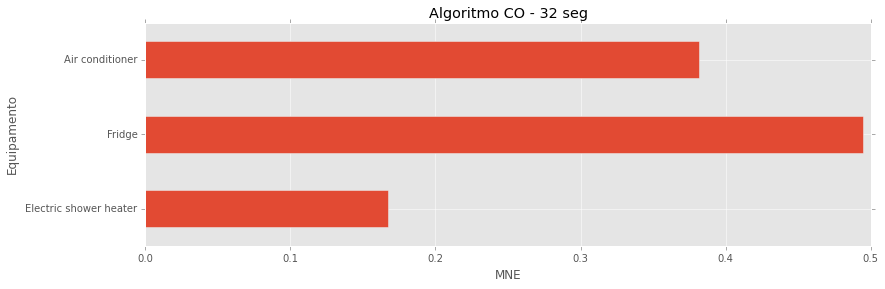

In [44]:
mne_co.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('MNE');
plt.title("Algoritmo CO - " + str(chooseSample) + " seg");

In [45]:
mne_co

Electric shower heater    0.167509
Fridge                    0.494404
Air conditioner           0.381946
dtype: float64

In [46]:
#Métrica RMS.
from nilmtk.metrics import rms_error_power
rms_co = rms_error_power(disag_co_elec, test_elec)
rms_co.index = disag_co_elec.get_labels(rms_co.index)

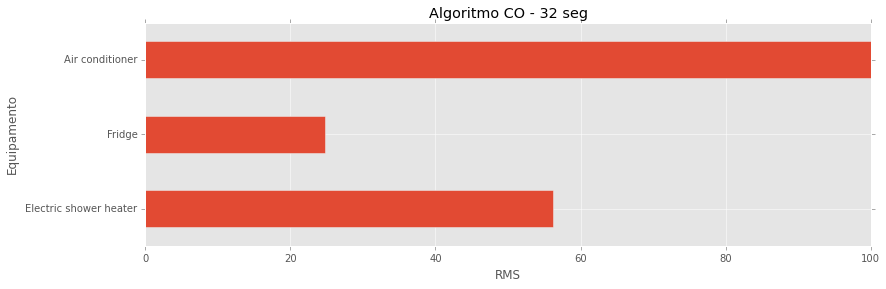

In [47]:
rms_co.plot(kind='barh')
plt.ylabel('Equipamento');
plt.xlabel('RMS');
plt.title("Algoritmo CO - " + str(chooseSample) + " seg");

In [48]:
rms_co

Electric shower heater    56.178114
Fridge                    24.723127
Air conditioner           99.972767
dtype: float64

In [79]:
#Métricas
#Arquivo com os resultados das métricas
path = '/home/harllan/Documentos/NILMTK_Disag/LAB_Tests/metrics_equip.txt'
result = ''

result = 'Fridge,' + str(chooseSample) + ',CO,' + str(f1_co['Fridge']) + ',' + str(mne_co['Fridge']) + ',' + str(rms_co['Fridge'])
result = result + '\n'
result = result + 'Shower,' + str(chooseSample) + ',CO,' + str(f1_co['Electric shower heater']) + ',' + str(mne_co['Electric shower heater']) + ',' + str(rms_co['Electric shower heater'])
result = result + '\n'
result = result + 'Air-conditioner,' + str(chooseSample) + ',CO,' + str(f1_co['Air conditioner']) + ',' + str(mne_co['Air conditioner']) + ',' + str(rms_co['Air conditioner'])

#Escrevendo em arquivo.txt
#'a' é de append, adiciona sem apagar o que já tem no arquivo
arquivo = open(path, 'a')
arquivo.write('\n')
arquivo.write(result)
arquivo.close()